# Libraries Importation & Data Pre-Processing

In [69]:
import pandas as pd
import numpy as np
from math import sqrt
#from scipy import stats
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
#from ggplot import *
from scipy.stats import chi2_contingency

In [3]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,0.92
1,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,0.76
2,3.0,316.0,104.0,3.0,3.0,3.5,8.00,1.0,0.72
3,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,0.80
4,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    float64
 1   GRE Score          501 non-null    float64
 2   TOEFL Score        500 non-null    float64
 3   University Rating  500 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    float64
 8   Chance of Admit    500 non-null    float64
dtypes: float64(9)
memory usage: 35.4 KB


# Hypothesis Testing Type 1

In [5]:
# n is the length of the sample
n = len(df)
print(n)

501


In [6]:
# s = sample variance
s = df["GRE Score"].var()
print(s)

127.32521600000001


In [7]:
# Z = test statistic
Z = (df["GRE Score"].mean()-310) / (s/sqrt(n))
print(Z)

1.137739798033408


In [8]:
# p-value of test statistic
p = 2*norm.cdf(-abs(Z))
print(p)

0.25522914984142087


# Hypothesis Testing Type 2

In [10]:
# withResearch = table with students having researches
# withoutResearch = table with students having no researches

withResearch = df[df["Research"] == 1]
withoutResearch = df[df["Research"] == 0]

In [11]:
# n1 = number of students having researches
n1 = len(withResearch)
print(n1)

280


In [12]:
# n2 = number of students having no researches
n2 = len(withoutResearch)
print(n2)

220


In [13]:
x1 = withResearch["Chance of Admit "].mean()
print(x1)

0.7899642857142857


In [14]:
x2 = withoutResearch["Chance of Admit "].mean()
print(x2)

0.634909090909091


In [15]:
var1 = withResearch["Chance of Admit "].var()
print(var1)

0.01518028545826933


In [16]:
var2 = withoutResearch["Chance of Admit "].var()
print(var1)

0.01518028545826933


In [17]:
t0 = (x1 - x2 - 0)/(sqrt((var1/n1) + (var2/n2)))
print(t0)

14.707274979628917


In [19]:
v = ((var1/n1) + (var2/n2)) * ((var1/n1) + (var2/n2)) / ((((var1/n1)*(var1/n1)) / (n1-1)) + (((var2/n2)*(var2/n2)) / (n2-1)))
print(v)

487.6049791861994


In [20]:
np.floor(v)

487.0

In [21]:
alpha = 0.05
t_alpha = stats.t.ppf(alpha/2, np.floor(v))
print(t_alpha)

-1.9648471009786466


In [32]:
from scipy import stats

# Perform the t-test
t, p = stats.ttest_ind(withResearch["Chance of Admit "], withoutResearch["Chance of Admit "])

# Print the p-value
print(p)


3.5954935458409782e-40


# Correlation

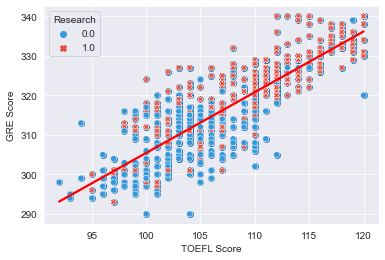

In [90]:
# Set the Seaborn style
sns.set_style("darkgrid")

# Scatterplot with regression line and confidence interval
sns.regplot(x="TOEFL Score", y="GRE Score", data=df,
            line_kws={"color": "red"}, ci=True)

# Add Pearson's correlation coefficient and p-value to the plot
sns.scatterplot(x="TOEFL Score", y="GRE Score", data=df,
                hue="Research", style="Research",
                palette=["#3498db", "#e74c3c"])

# Set the x-axis label
plt.xlabel("TOEFL Score")

# Set the y-axis label
plt.ylabel("GRE Score")

# Show the plot
plt.show()


In [24]:
df1 = df.dropna()

In [28]:
# Calculate the correlation coefficient
r, p = stats.pearsonr(df1["TOEFL Score"], df1['GRE Score'])

# Print the correlation coefficient
print(r)


0.827200403531721


In [35]:
x1 = withResearch["TOEFL Score"].mean()
print(x1)

109.70714285714286


In [36]:
x2 = withoutResearch["GRE Score"].mean()
print(x2)

309.3


In [37]:
var1 = withResearch["TOEFL Score"].var()
print(var1)

33.53399897593446


In [38]:
var2 = withoutResearch["GRE Score"].var()
print(var1)

33.53399897593446


In [39]:
t0 = (x1 - x2 - 0)/(sqrt((var1/n1) + (var2/n2)))
print(t0)

-295.9869985830399


In [42]:
from scipy import stats

# Perform the t-test
t, p = stats.ttest_ind(withResearch["TOEFL Score"], withoutResearch["GRE Score"])

# Print the t-value
print(t)


-309.6310088455176


## Regression

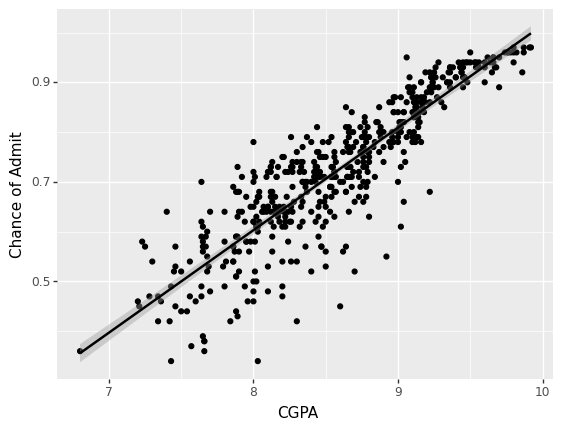

<ggplot: (93854472813)>

In [61]:
from plotnine import *

(ggplot(df1, aes(x='CGPA', y="Chance of Admit "))
 + geom_point()
 + geom_smooth(method='lm'))

In [65]:
from sklearn.linear_model import LinearRegression

# Split the data into independent and dependent variables
X = df1[['CGPA']]
y = df1["Chance of Admit "]

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the data
model.fit(X, y)

# Print the model coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')

Intercept: -1.044334923899038
Coefficient: 0.2059216789132832


In [72]:
df1.rename(columns = {'Chance of Admit ' : 'COA'}, inplace = True)

C:\Users\pc\AppData\Local\Temp\ipykernel_12072\167838669.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [74]:
import statsmodels.formula.api as smf

# Fit the model
model = smf.ols(formula='COA ~ CGPA', data=df1)
results = model.fit()

# Get the R-squared value
r2 = results.rsquared
print(f'R-squared: {r2:.2f}')

R-squared: 0.78


In [117]:
results.pvalues

Intercept     1.761419e-88
CGPA         3.396545e-165
dtype: float64

In [76]:
CGPA = df1["CGPA"]
COA = df1["COA"]

In [77]:
(((CGPA - CGPA.mean()) * (COA - COA.mean())).sum())/((CGPA - CGPA.mean())*(CGPA - CGPA.mean())).sum()

0.20592167891328325

In [78]:
b1 = (((CGPA - CGPA.mean()) * (COA - COA.mean())).sum())/((CGPA - CGPA.mean())*(CGPA - CGPA.mean())).sum()
b1 = COA.mean()-(b1*CGPA.mean())
print(b1)

-1.0443349238990385


In [79]:
b0 = COA.mean()-(b1*CGPA.mean())
print(b0)

9.678415814724667


In [80]:
SSE = (COA.mean() - (b1*CGPA.mean()*CGPA.mean())).sum()
print(SSE)

77.5381327244372


In [81]:
sb1 = (sqrt(SSE/48)) / (sqrt(COA.mean() - b1*CGPA.mean()))
print(sb1)

0.408540307982578


In [82]:
t0 = b1/sb1
print(t0)

-2.5562592074600716
